### Read NYC shapefiles 

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Read AGEBs'shapefile
nycha = "NYCHA GIS file/nycha_shape.shp"
nynta = "nynta_19b-1/nynta.shp"

map_nycha = gpd.read_file(nycha)
map_nycha['2015_random'] = np.random.randint(0,6, size=len(map_nycha)) ## random number for 2015
map_nycha['2016_random'] = np.random.randint(0,6, size=len(map_nycha)) ## random number for 2016 
map_nycha['2017_random'] = np.random.randint(0,6, size=len(map_nycha)) ## random number for 2017 
map_nycha['2018_random'] = np.random.randint(0,6, size=len(map_nycha)) ## random number for 2017 

map_nycha.describe()
map_nycha.head()

map_nynta = gpd.read_file(nynta)
map_nynta.head()



,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN51,Murray Hill,33266.904995,5.248828e+07,"POLYGON ((1038593.459228516 221913.3550415039,..."
2,4,Queens,081,QN27,East Elmhurst,19816.712293,1.972685e+07,"POLYGON ((1022728.274841309 217530.8082275391,..."
3,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.66003418 201007.0130004883, ..."
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.2606201172 238490.1047973633,..."


### Adjust the coordinate system

In [4]:
map_nycha.crs 

# Change to Web Mercator projection
map_nycha = map_nycha.to_crs({'init': 'epsg:4326'}) # compatible with Google Maps
map_nynta = map_nynta.to_crs({'init': 'epsg:4326'})


In [5]:
# Count how many polygons in each shapefile
map_nycha.count()
map_nynta.count()



BoroCode      195
BoroName      195
CountyFIPS    195
NTACode       195
NTAName       195
Shape_Leng    195
Shape_Area    195
geometry      195
dtype: int64

### Plot NYCHA map

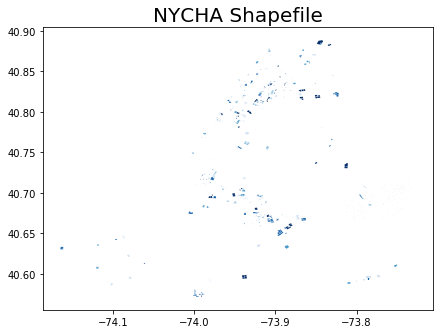

In [6]:
f, ax = plt.subplots(1, figsize=(7, 7))
ax.set_title('NYCHA Shapefile', fontdict={'fontsize': '20', 'fontweight' : '3'})
map_nycha.plot(column='2015_random', cmap='Blues', ax=ax) 

plt.show()

### Plot neighborhoods' map

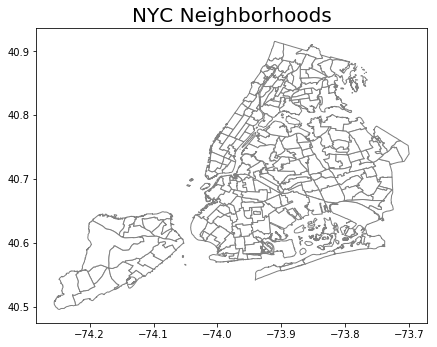

In [7]:

f, ax = plt.subplots(1, figsize=(7, 7))
ax.set_title('NYC Neighborhoods', fontdict={'fontsize': '20', 'fontweight' : '3'})

map_nynta.plot(facecolor='white', edgecolor='grey', ax=ax) 

plt.show()


### Plot both maps

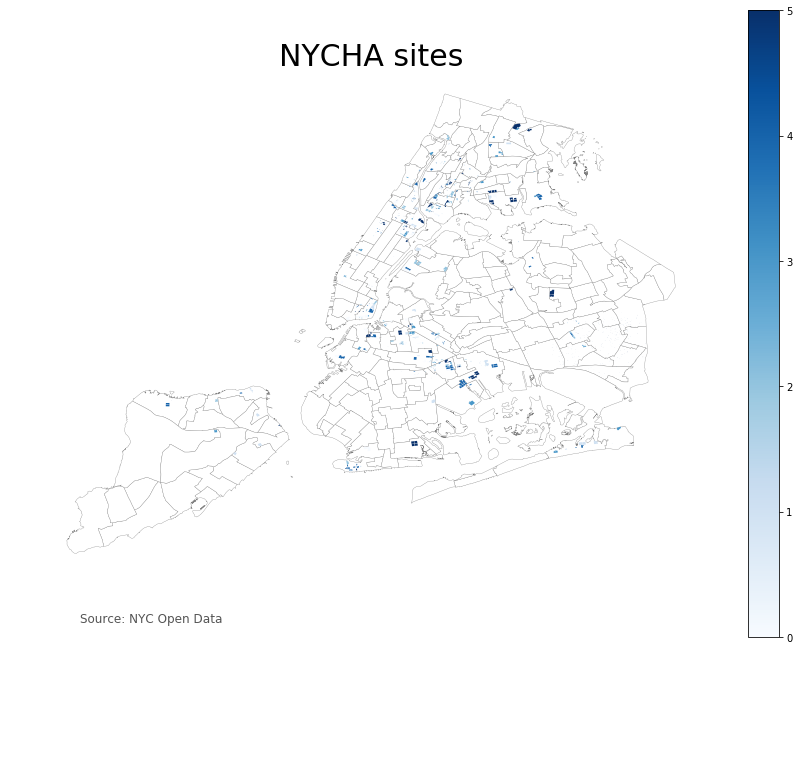

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
f.subplots_adjust(bottom=0.3)
ax.set_title('NYCHA sites', fontdict={'fontsize': '30', 'fontweight' : '3'})
ax.annotate('Source: NYC Open Data',xy=(0.1, 0.2), 
            xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='top', fontsize=12, color='#555555')
            
map_nynta.plot(facecolor='white', edgecolor='grey', linewidth=0.3, ax=ax) # NYNTA layer
map_nycha.plot(column='2015_random', cmap='Blues', ax=ax) # neighborhoods' layer -- cloroperths with variable "random"

# Create colorbar as a legend
vmin, vmax = 0, 5
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = f.colorbar(sm)
ax.axis('off')
plt.show()

### Make a GIF map

In [9]:
# save all the maps in the charts folder
output_path = 'charts'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2015_random','2016_random','2017_random','2018_random']

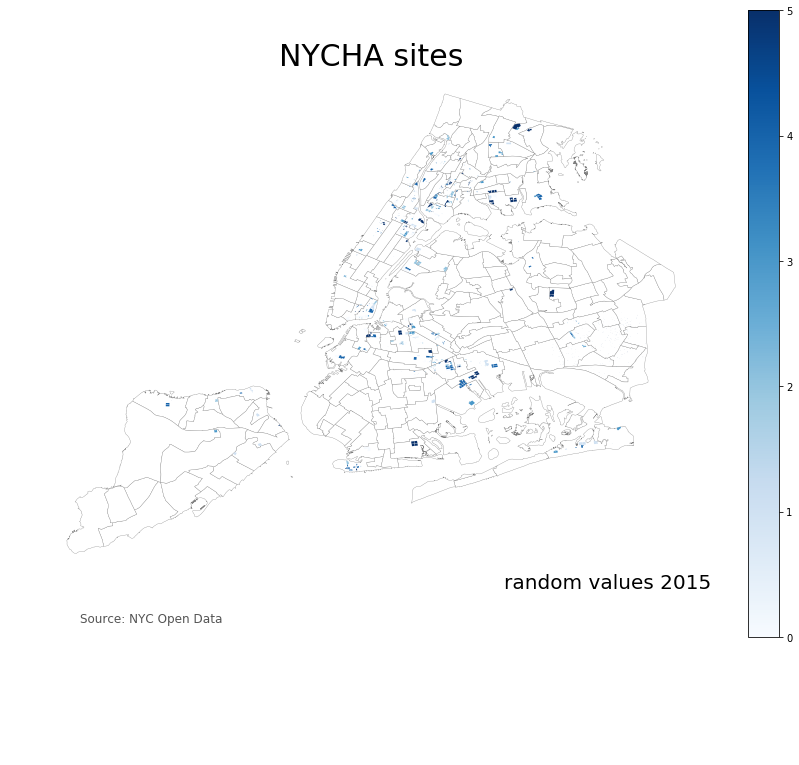

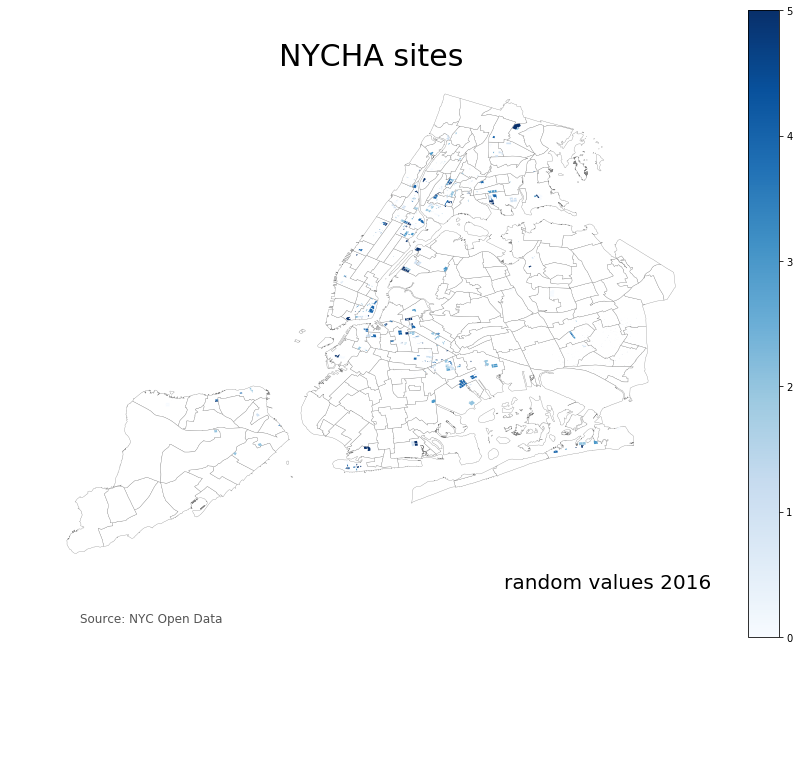

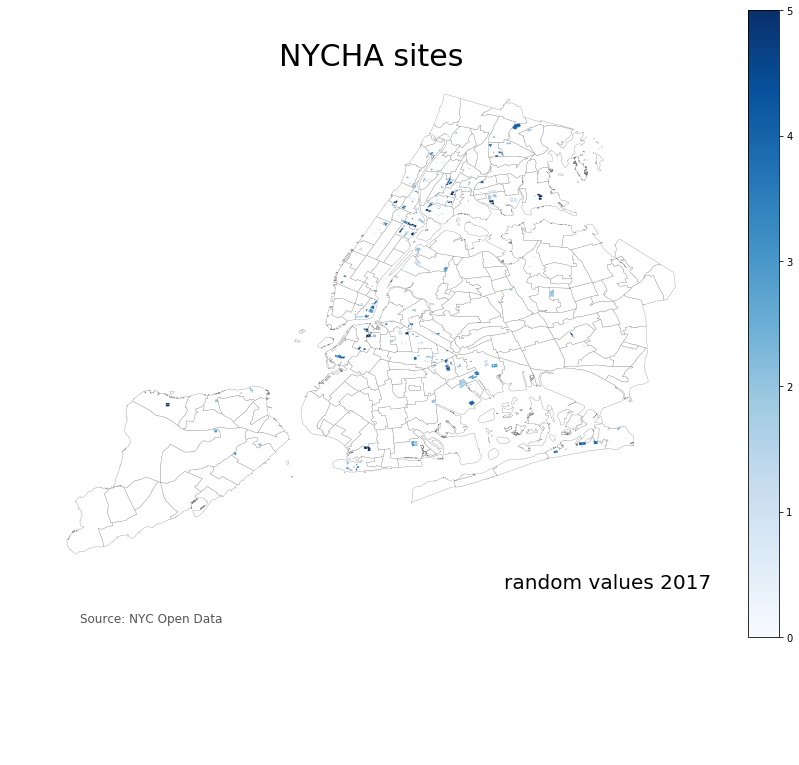

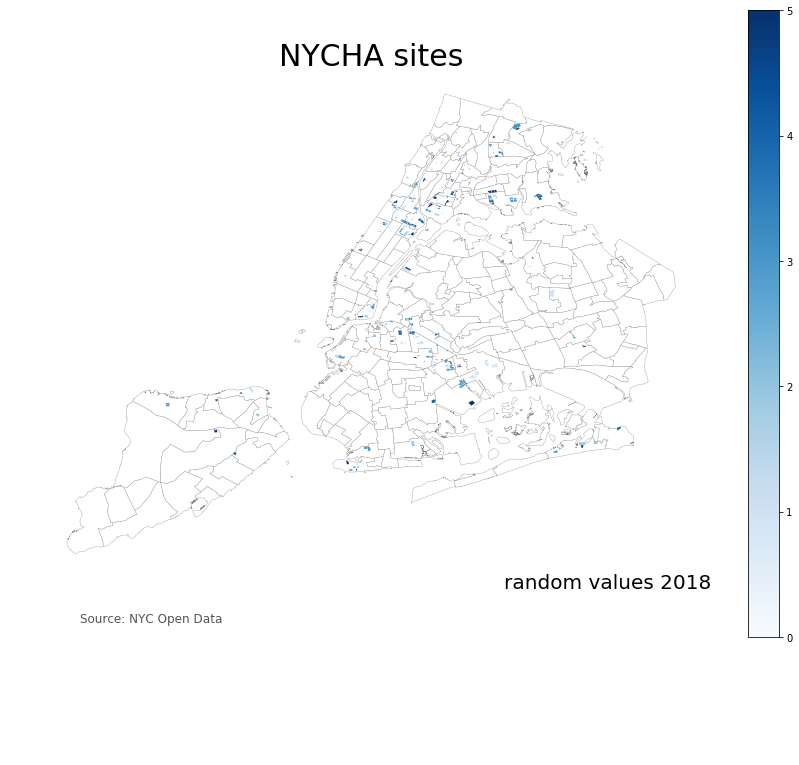

In [30]:
import os
# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    

    f, ax = plt.subplots(figsize=(15, 15))
    f.set_canvas(plt.gcf().canvas)
    f.subplots_adjust(bottom=0.3)
    ax.set_title('NYCHA sites', fontdict={'fontsize': '30', 'fontweight' : '3'})
    ax.annotate('Source: NYC Open Data',xy=(0.1, 0.2), 
                xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='top', fontsize=12, color='#555555')

    map_nynta.plot(facecolor='white', edgecolor='grey', linewidth=0.3, ax=ax) # NYNTA layer
    map_nycha.plot(column=year, cmap='Blues', ax=ax) # neighborhoods' layer -- cloroperths with variable "random"

        
    # create an annotation for the year by grabbing the first 4 digits
    only_year = year[:4]
    # position the annotation to the bottom left
    ax.annotate('random values ' + only_year,
            xy=(0.63, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

    # Create colorbar as a legend
    vmin, vmax = 0, 5
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = f.colorbar(sm)
    ax.axis('off')
    plt.savefig('maps/map_'+ only_year+'.jpg')
    plt.show()
    


    


'maps/random_map.gif'